In [1]:
#from HeaderP import *
import pandas as pd

In [2]:
APOGEE=pd.read_pickle('./Data/APOGEE_dr16.pkl')
GALAH=pd.read_pickle('./Data/galah_dr3_gaia_cm.pkl')
Kepler_prot=pd.read_pickle('./Data/Kepler_Periodic.pkl')
Kepler_nonprot=pd.read_pickle('./Data/Kepler_Non_Periodic.pkl')
RAVE=pd.read_csv('./Data/ravedr6.csv')
LAMOST=pd.read_csv('./Data/LAMOST_dr6_v2_LRS.csv',delimiter='|')
TESS=pd.read_pickle('./Data/TESS_target.pkl')



/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
SurveyDic={0:APOGEE,1:GALAH,2:Kepler_prot,3:Kepler_nonprot,4:RAVE,5:LAMOST,6:TESS}
SurveyDic_name={0:'APOGEE',1:'GALAH',2:'Kepler_prot',3:'Kepler_nonprot',4:'RAVE',5:'LAMOST',6:'TESS'}

from itertools import combinations

cms=list(combinations(range(7), 2))
for i in range(3,7):
    newlist=list(combinations(range(7), i))
    for j in newlist:
        cms.append(j)

In [4]:
print(len(Kepler_prot))

38573


In [5]:

# read in data
surveys=[]
datanum=[]
for i in range(len(cms)):
    # how many surveys to cm
    cm_survey=[]
    cm_survey.append(SurveyDic_name[cms[i][0]])
    cm_survey.append(SurveyDic_name[cms[i][1]])
    cmname=SurveyDic_name[cms[i][0]]+'_cm_'+SurveyDic_name[cms[i][1]]
    cmlen=len(cms[i])
    if cmlen>2:
        for j in range(1,cmlen-1):
            cm_survey.append(SurveyDic_name[cms[i][j+1]])
            cmname=cmname+'_cm_'+SurveyDic_name[cms[i][j+1]]
    
    try:
        df1df2=pd.read_pickle('Data/'+cmname+'.pkl')
        print(cm_survey,',',cmlen,',',len(df1df2),cmname)
        surveys.append(cm_survey)
        datanum.append(len(df1df2))
    except:
        continue

['APOGEE', 'GALAH'] , 2 , 14399 APOGEE_cm_GALAH
['APOGEE', 'Kepler_prot'] , 2 , 2108 APOGEE_cm_Kepler_prot
['APOGEE', 'Kepler_nonprot'] , 2 , 2388 APOGEE_cm_Kepler_nonprot
['APOGEE', 'RAVE'] , 2 , 6858 APOGEE_cm_RAVE
['APOGEE', 'LAMOST'] , 2 , 225637 APOGEE_cm_LAMOST
['APOGEE', 'TESS'] , 2 , 33311 APOGEE_cm_TESS
['GALAH', 'RAVE'] , 2 , 35844 GALAH_cm_RAVE
['GALAH', 'LAMOST'] , 2 , 84370 GALAH_cm_LAMOST
['GALAH', 'TESS'] , 2 , 46265 GALAH_cm_TESS
['Kepler_prot', 'LAMOST'] , 2 , 21897 Kepler_prot_cm_LAMOST
['Kepler_prot', 'TESS'] , 2 , 459 Kepler_prot_cm_TESS
['Kepler_nonprot', 'LAMOST'] , 2 , 51323 Kepler_nonprot_cm_LAMOST
['Kepler_nonprot', 'TESS'] , 2 , 234 Kepler_nonprot_cm_TESS
['RAVE', 'LAMOST'] , 2 , 15819 RAVE_cm_LAMOST
['RAVE', 'TESS'] , 2 , 101767 RAVE_cm_TESS
['LAMOST', 'TESS'] , 2 , 34766 LAMOST_cm_TESS
['APOGEE', 'GALAH', 'RAVE'] , 3 , 1176 APOGEE_cm_GALAH_cm_RAVE
['APOGEE', 'GALAH', 'LAMOST'] , 3 , 5998 APOGEE_cm_GALAH_cm_LAMOST
['APOGEE', 'GALAH', 'TESS'] , 3 , 5953 APOGEE

In [6]:
from upsetplot import generate_counts
from upsetplot import from_memberships

In [23]:
example = from_memberships(
    surveys,
    data=datanum)

In [24]:
from upsetplot import plot

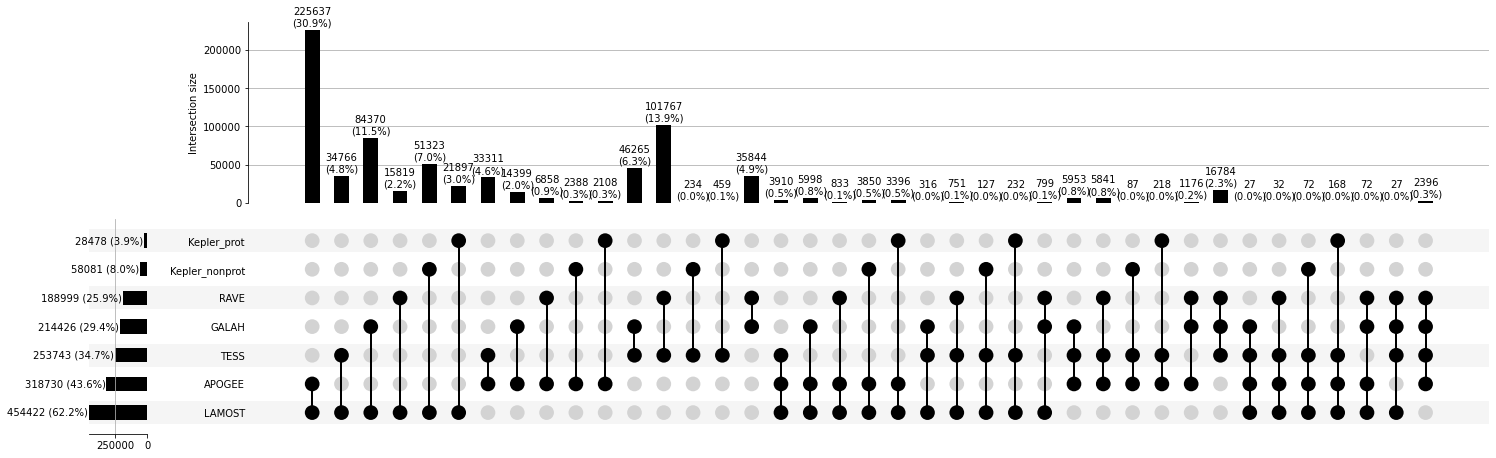

<Figure size 432x288 with 0 Axes>

In [112]:
import matplotlib.pyplot as plt
from upsetplot import UpSet
fig, ax=plt.figsize=(20,10)
upset = UpSet(example, show_counts='%d',element_size=42,show_percentages=True)
upset.plot()
plt.show()
plt.savefig('Table_sum.png')

## Add in other features


In [7]:
from HeaderP import *

def m_to_M(m, D):
    """
    Convert apparent magnitude to absolute magnitude.
    """
    return m - 5*np.log10(D)-10
    

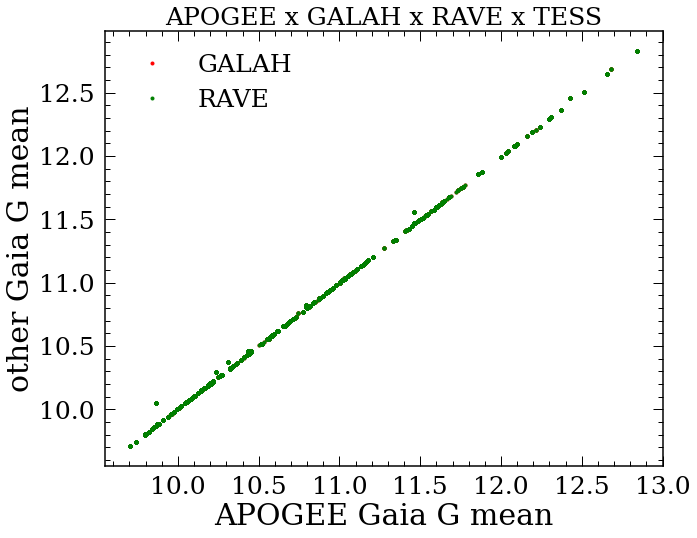

In [184]:
plt.figure(figsize=(10,8))
plt.plot(cm4['GAIA_PHOT_G_MEAN_MAG'],cm4['phot_g_mean_mag'],'r.',label='GALAH')
plt.plot(cm4['GAIA_PHOT_G_MEAN_MAG'],cm4['phot_g_mean_mag_y'],'g.',label='RAVE')
plt.xlabel('APOGEE Gaia G mean')
plt.ylabel('other Gaia G mean')
plt.title('APOGEE x GALAH x RAVE x TESS',fontsize=25)
plt.legend()

In [199]:
LAMOST.columns

Index(['obsid', 'designation', 'obsdate', 'lmjd', 'mjd', 'planid', 'spid',
       'fiberid', 'ra_obs', 'dec_obs', 'snru', 'snrg', 'snrr', 'snri', 'snrz',
       'objtype', 'class', 'subclass', 'z', 'z_err', 'magtype', 'mag1', 'mag2',
       'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'tsource', 'fibertype', 'tfrom',
       'tcomment', 'offsets', 'offsets_v', 'ra', 'dec', 'fibermask', 'survey',
       'dtypes', 'color'],
      dtype='object')

## Try to get all columns

In [8]:
def convd2R(rad):
    return rad/180*np.pi

def m_to_M(m, D):
    """
    Convert apparent magnitude to absolute magnitude.
    """
    return m - 5*np.log10(D)-10
    
    
def getpara(df,surveyname,idname,teff=' ',gaiag=' ',dist=' ',gaiabp=' ',gaiarp=' ',glat=' ',glon=' ',
            alpha=' ',fe=' ',logg=' ',prot=False):
    df_cm=pd.DataFrame(df[idname])
    df_cm['ID']=df[idname]
    # put in teff
    if (teff)==' ':
        df_cm['teff']=np.nan
    else:
        df_cm['teff']=df[teff]
        
    # put in abs_g
    if ((gaiag)==' ') or ((dist)==' '):
        df_cm['abs_G']=np.nan
    else:
        df_cm['abs_G']=m_to_M(df[gaiag],df[dist]/1000)
    
    # R
    if ((dist)==' ') or ((glat)==' '):
        df_cm['X'] = np.nan
        df_cm['Y'] = np.nan
        df_cm['z'] = np.nan
        df_cm['R'] = np.nan
    else:
        df_cm['X'] = df[dist] * np.cos(convd2R(df[glat])) * np.cos(convd2R(df[glon])) / 1000.
        df_cm['Y'] = -df[dist] * np.sin(convd2R(df[glon])) * np.cos(convd2R(df[glat]))/ 1000.
        df_cm['z'] = df[dist] * np.sin(convd2R(df[glat]))/ 1000.
        df_cm['R'] = np.sqrt(np.power(df_cm.X - 8.2,2.) + np.power(df_cm.Y,2.))
    
    # put in color
    if (gaiabp)==' ' or (gaiarp)==' ':
        df_cm['color']=np.nan
    else:
        df_cm['color']=df[gaiabp]-df[gaiarp]
        
    # put in alpha_fe
    if (alpha)==' ':
        df_cm['alpha_fe']=np.nan
    else:
        df_cm['alpha_fe']=df[alpha]
    
    
    # put in fe
    if (fe)==' ':
        df_cm['fe_h']=np.nan
    else:
        df_cm['fe_h']=df[fe]
    
    # put in logg
    if (logg)==' ':
        df_cm['logg']=np.nan
    else:
        df_cm['logg']=df[logg]
    
    if prot:
        df_cm['Prot']=df['Prot']
    else:
        df_cm['Prot']=np.nan
    
    df_cm['APOGEE']=(surveyname=='APOGEE')
    df_cm['TESS']=(surveyname=='TESS')
    df_cm['GALAH']=(surveyname=='GALAH')
    df_cm['Kepler_prot']=(surveyname=='Kepler_prot')
    df_cm['Kepler_nonprot']=(surveyname=='Kepler_nonprot')
    df_cm['RAVE']=(surveyname=='RAVE')
    df_cm['LAMOST']=(surveyname=='LAMOST')
    
    return df_cm



In [9]:
ravetemp=pd.read_csv('Data/ravedr6_tempdata.csv')
raveabund=pd.read_csv('Data/ravedr6_abund.csv')

In [10]:
RAVE=pd.merge(RAVE,ravetemp,left_on='rave_obs_id',right_on='rave_obs_id',how='inner')
RAVE=pd.merge(RAVE,raveabund,left_on='rave_obs_id',right_on='rave_obs_id',how='inner')

In [11]:
import numpy as np
APOGEE_cm=getpara(APOGEE,'APOGEE', 'APOGEE_ID', teff='TEFF_SPEC',gaiag='GAIA_PHOT_G_MEAN_MAG',
                  dist='GAIA_R_EST',gaiabp='GAIA_PHOT_BP_MEAN_MAG',gaiarp='GAIA_PHOT_RP_MEAN_MAG',
                  alpha='ALPHA_M',fe='M_H',logg='LOGG_SPEC',glat='GLAT',glon='GLON')

GALAH_cm=getpara(GALAH,'GALAH', 'sobject_id', teff='teff',gaiag='phot_g_mean_mag_y',
                  dist='r_est',gaiabp='phot_bp_mean_mag',gaiarp='phot_rp_mean_mag',
                  alpha='alpha_fe',fe='fe_h',logg='logg',glat='b',glon='l') 

Kepler_prot_cm=getpara(Kepler_prot,'Kepler_prot', 'KID', teff='teff',gaiag='phot_g_mean_mag',
                  dist='r_est',gaiabp='phot_bp_mean_mag',gaiarp='phot_rp_mean_mag',glat='b',glon='l',
                  prot=True)      

Kepler_nonprot_cm=getpara(Kepler_nonprot,'Kepler_nonprot', 'KID', teff='teff',gaiag='phot_g_mean_mag',
                  dist='r_est',gaiabp='phot_bp_mean_mag',gaiarp='phot_rp_mean_mag',glat='b',glon='l',
                  prot=True)   

RAVE_cm=getpara(RAVE,'RAVE','rave_obs_id',teff='teff_cal_madera',gaiag='phot_g_mean_mag',
                  dist='distance_bdasp',gaiabp='phot_bp_mean_mag',gaiarp='phot_rp_mean_mag',
                  alpha='al_h_gauguin',fe='fe_h_gauguin',glat='b',glon='l',logg='logg_cal_madera') 

LAMOST_cm=getpara(LAMOST,'LAMOST','obsid') 

TESS_CM=getpara(TESS,'TESS','TICID')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
Kepler_nonprot_cm['prot']

In [12]:
joindf=pd.concat([APOGEE_cm,GALAH_cm,Kepler_prot_cm,Kepler_nonprot_cm,RAVE_cm,LAMOST_cm,TESS_CM])

In [13]:
# get rid of repeated stars
idnames_dic={'APOGEE':'APOGEE_ID','GALAH':'sobject_id','Kepler_prot':'KID',
         'Kepler_nonprot':'KID','RAVE':'rave_obs_id','LAMOST':'obsid','TESS':'TICID'}
checkorders=['TESS','LAMOST','Kepler_nonprot','Kepler_prot','RAVE','GALAH',
             'APOGEE']
checkorders=checkorders[::-1]
surveys=[]
datanum=[]

for i in range(len(cms)):
    # how many surveys to cm
    cm_survey=[]
    cm_survey.append(SurveyDic_name[cms[i][0]])
    cm_survey.append(SurveyDic_name[cms[i][1]])
    cmname=SurveyDic_name[cms[i][0]]+'_cm_'+SurveyDic_name[cms[i][1]]
    cmlen=len(cms[i])
    if cmlen>2:
        for j in range(1,cmlen-1):
            cm_survey.append(SurveyDic_name[cms[i][j+1]])
            cmname=cmname+'_cm_'+SurveyDic_name[cms[i][j+1]]
    
    try:
        df1df2=pd.read_pickle('Data/'+cmname+'.pkl')
        m=[(i in cmname) for i in checkorders]
        surveydata=m.index(1)
        print(np.array(checkorders)[m],len(df1df2))          
        print(len(joindf))
        for mm in range(len(m)):
            if m[mm]:
                if mm==surveydata:
                    continue
                else:
                    tm=joindf[idnames_dic[checkorders[mm]]].isin(df1df2[idnames_dic[checkorders[mm]]])
                    print(sum(tm))
                    # get rid of repeating stars
                    joindf=joindf[~tm].reset_index(drop=True)
                    # get stars that has the best observations
                    tm_2=joindf[idnames_dic[checkorders[surveydata]]].isin(df1df2[idnames_dic[checkorders[surveydata]]])
                    joindf[checkorders[mm]][tm_2]=True  
                    print(print(checkorders[mm]),len(joindf))
                if m[3]:
                    tm_3=joindf[idnames_dic[checkorders[mm]]].isin(df1df2[idnames_dic[checkorders[surveydata]]])
                    joindf['Kepler_prot'][tm_3]=True
                    tm_4=joindf[idnames_dic[checkorders[mm]]].isin(df1df2[idnames_dic[checkorders[3]]])
                    joindf['Prot'][tm_4]=joindf['ID'].isin(df1df2[idnames_dic[checkorders[3]]])['Prot']
        
    except:
        continue

['APOGEE' 'GALAH'] 14399
11767887
14399


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


GALAH
None 11753488
['APOGEE' 'Kepler_prot'] 2108
11753488
2108


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_prot
None 11751380
['APOGEE' 'Kepler_nonprot'] 2388
11751380
2391


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_nonprot
None 11748989
['APOGEE' 'RAVE'] 6858
11748989
16


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11748973
['APOGEE' 'LAMOST'] 225637
11748973
225637


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11523336
['APOGEE' 'TESS'] 33311
11523336
33892


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


TESS
None 11489444
['GALAH' 'RAVE'] 35844
11489444
59


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11489385
['GALAH' 'LAMOST'] 84370
11489385
78373


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11411012
['GALAH' 'TESS'] 46265
11411012
40220


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


TESS
None 11370792
['Kepler_prot' 'LAMOST'] 21897
11370792
18542


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11352250


<ipython-input-13-ca848c28d172>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf['Kepler_prot'][tm_3]=True


['Kepler_prot' 'TESS'] 459
11352250
243


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


TESS
None 11352007


<ipython-input-13-ca848c28d172>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf['Kepler_prot'][tm_3]=True


['Kepler_nonprot' 'LAMOST'] 51323
11352007
47547


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11304460
['Kepler_nonprot' 'TESS'] 234
11304460
146


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


TESS
None 11304314
['RAVE' 'LAMOST'] 15819
11304314
14255


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11290059
['RAVE' 'TESS'] 101767
11290059
81779


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


TESS
None 11208280
['LAMOST' 'TESS'] 34766
11208280
30093


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


TESS
None 11178187
['APOGEE' 'GALAH' 'RAVE'] 1176
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


GALAH
None 11178187
0
RAVE
None 11178187
['APOGEE' 'GALAH' 'LAMOST'] 5998
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


GALAH
None 11178187
0
LAMOST
None 11178187
['APOGEE' 'GALAH' 'TESS'] 5953
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


GALAH
None 11178187
0
TESS
None 11178187
['APOGEE' 'Kepler_prot' 'LAMOST'] 3396
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_prot
None 11178187
['APOGEE' 'Kepler_prot' 'TESS'] 218
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_prot
None 11178187
['APOGEE' 'Kepler_nonprot' 'LAMOST'] 3850
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_nonprot
None 11178187
0
LAMOST
None 11178187
['APOGEE' 'Kepler_nonprot' 'TESS'] 87
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_nonprot
None 11178187
0
TESS
None 11178187
['APOGEE' 'RAVE' 'LAMOST'] 833
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11178187
0
LAMOST
None 11178187
['APOGEE' 'RAVE' 'TESS'] 5841
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11178187
0
TESS
None 11178187
['APOGEE' 'LAMOST' 'TESS'] 3910
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11178187
0
TESS
None 11178187
['GALAH' 'RAVE' 'LAMOST'] 799
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11178187
0
LAMOST
None 11178187
['GALAH' 'RAVE' 'TESS'] 16784
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11178187
0
TESS
None 11178187
['GALAH' 'LAMOST' 'TESS'] 316
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11178187
0
TESS
None 11178187
['Kepler_prot' 'LAMOST' 'TESS'] 232
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11178187


<ipython-input-13-ca848c28d172>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf['Kepler_prot'][tm_3]=True


['Kepler_nonprot' 'LAMOST' 'TESS'] 127
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11178187
0
TESS
None 11178187
['RAVE' 'LAMOST' 'TESS'] 751
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


LAMOST
None 11178187
0
TESS
None 11178187
['APOGEE' 'GALAH' 'RAVE' 'LAMOST'] 72
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


GALAH
None 11178187
0
RAVE
None 11178187
0
LAMOST
None 11178187
['APOGEE' 'GALAH' 'RAVE' 'TESS'] 2396
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


GALAH
None 11178187
0
RAVE
None 11178187
0
TESS
None 11178187
['APOGEE' 'GALAH' 'LAMOST' 'TESS'] 27
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


GALAH
None 11178187
0
LAMOST
None 11178187
0
TESS
None 11178187
['APOGEE' 'Kepler_prot' 'LAMOST' 'TESS'] 168
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_prot
None 11178187
['APOGEE' 'Kepler_nonprot' 'LAMOST' 'TESS'] 72
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


Kepler_nonprot
None 11178187
0
LAMOST
None 11178187
0
TESS
None 11178187
['APOGEE' 'RAVE' 'LAMOST' 'TESS'] 32
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11178187
0
LAMOST
None 11178187
0
TESS
None 11178187
['GALAH' 'RAVE' 'LAMOST' 'TESS'] 27
11178187
0


<ipython-input-13-ca848c28d172>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joindf[checkorders[mm]][tm_2]=True


RAVE
None 11178187
0
LAMOST
None 11178187
0
TESS
None 11178187


In [19]:
#pd.read_pickle('Data/APOGEE_cm_Kepler_prot.pkl')['KID']

#sum(joindf[idnames_dic[checkorders[surveydata]]].isin(df1df2[idnames_dic[checkorders[surveydata]]]))



In [14]:
joindf = joindf.set_index(checkorders)


In [79]:

#joindf.to_pickle('Data/mergeall.pkl')





In [106]:
joindf=pd.read_pickle('Data/mergeall.pkl')



In [112]:
cannonage=pd.read_pickle('../SecondYear/CannonDR16.pkl')

joindf=joindf.reset_index().merge(cannonage[['APOGEE_ID','Age']], left_on='APOGEE_ID',right_on='APOGEE_ID',how="inner").set_index(joindf.index.names)


In [113]:
joindf

APOGEE_ID  \
APOGEE GALAH RAVE  Kepler_prot Kepler_nonprot LAMOST TESS                        
True   False False False       False          False  False  2M00000211+6327470   
                                                     False  2M00000446+5854329   
                                                     False  2M00000866+7122144   
                                                     False  2M00000943+6254542   
                                                     False  2M00001199+6114138   
...                                                                        ...   
                                                     False  2M23594762+6220229   
                                              True   False  2M23594776+1524307   
                                              False  False  2M23594866+6258182   
                                                     False  2M23595249+6307281   
                                                     False  2M23595481+7509560   

                                                                            ID  \
APOGEE GALAH RAVE  Kepler_prot Kepler_nonprot LAMOST TESS                        
True   False False False       False          False  False  2M00000211+6327470   
                                                     False  2M00000446+5854329   
                                                     False  2M00000866+7122144   
                                                     False  2M00000943+6254542   
                                                     False  2M00001199+6114138   
...                                                                        ...   
                                                     False  2M23594762+6220229   
                                              True   False  2M23594776+1524307   
                                              False  False  2M23594866+6258182   
                                                     False  2M23595249+6307281   
                                                     False  2M23595481+7509560   

                                                                   teff  \
APOGEE GALAH RAVE  Kepler_prot Kepler_nonprot LAMOST TESS                 
True   False False False       False          False  False  4617.799805   
                                                     False  4724.899902   
                                                     False  4607.000000   
                                                     False  4569.600098   
                                                     False  4611.000000   
...                                                                 ...   
                                                     False  4740.399902   
                                              True   False  4788.100098   
                                              False  False  4524.600098   
                                                     False  4612.500000   
                                                     False  4742.500000   

                                                               abs_G  \
APOGEE GALAH RAVE  Kepler_prot Kepler_nonprot LAMOST TESS              
True   False False False       False          False  False -0.282855   
                                                     False  1.654455   
                                                     False  1.956439   
                                                     False  2.706070   
                                                     False  1.603663   
...                                                              ...   
                                                     False  2.019743   
                                              True   False  0.384953   
                                              False  False  0.060020   
                                                     False  1.701786   
                                                     False  2.243240   

                      

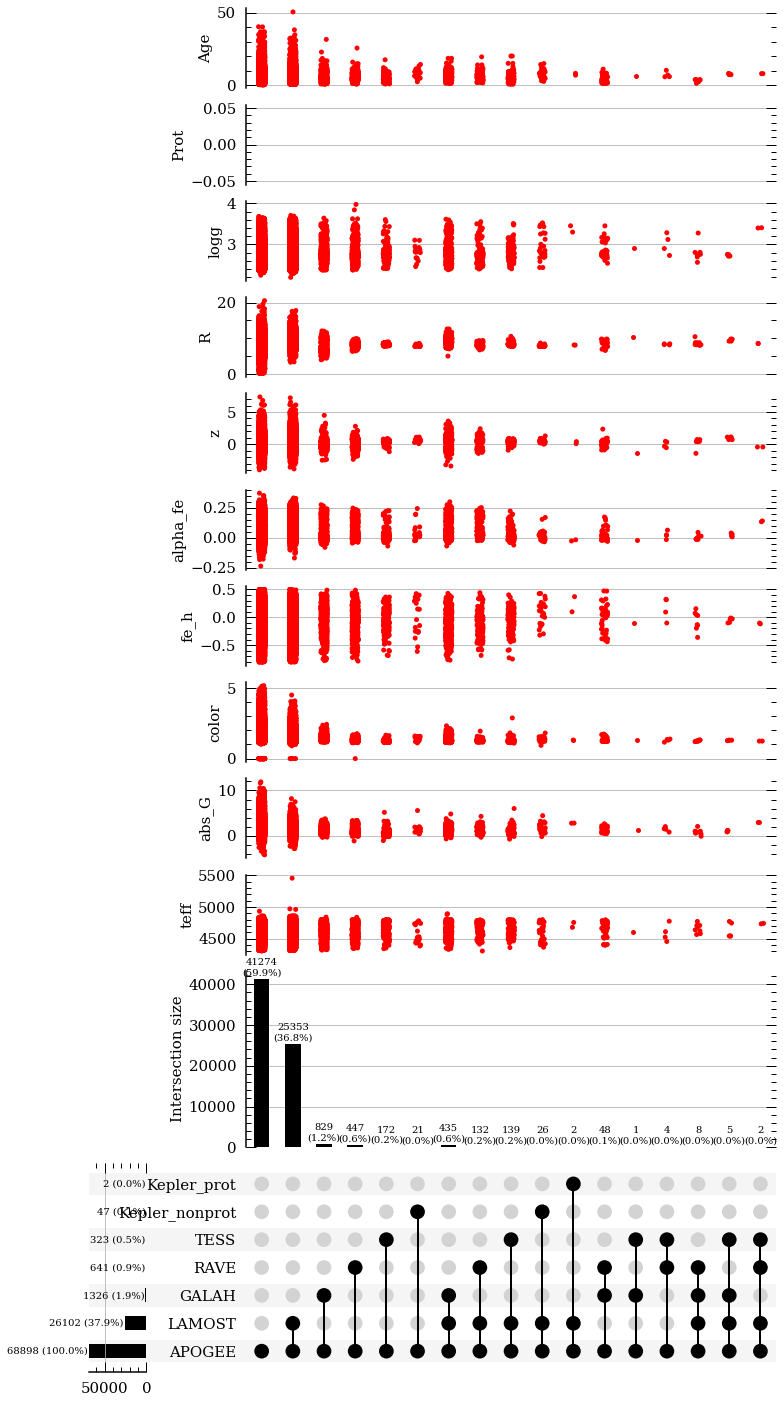

In [114]:
import matplotlib.pyplot as plt
from upsetplot import UpSet

plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 15,
   'axes.linewidth': 1.5,
   'legend.fontsize': 15,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 15,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 15,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   'text.usetex': False,
   }
plt.rcParams.update(params)

"""     
def add_catplot(self, kind, value=None, elements=3, **kw):
        assert not set(kw.keys()) & {'ax', 'data', 'x', 'y', 'orient'}
        if value is None:
            if '_value' not in self._df.columns:
                raise ValueError('value cannot be set if data is a Series. '
                                 'Got %r' % value)
        else:
            if value not in self._df.columns:
                raise ValueError('value %r is not a column in data' % value)
        self._subset_plots.append({'type': 'catplot',
                                   'value': value,
                                   'kind': kind,
                                   'id': 'extra%d' % len(self._subset_plots),
                                   'elements': elements,
                                   'kw': kw})


    def _plot_catplot(self, ax, value, kind, kw):
        df = self._df
        if value is None and '_value' in df.columns:
            value = '_value'
        elif value is None:
            raise ValueError('value can only be None when data is a Series')
        kw = kw.copy()
        if self._horizontal:
            kw['orient'] = 'v'
            kw['x'] = '_bin'
            kw['y'] = value
        else:
            kw['orient'] = 'h'
            kw['x'] = value
            kw['y'] = '_bin'
        import seaborn
        kw['ax'] = ax
        getattr(seaborn, kind + 'plot')(data=df, **kw)

        ax = self._reorient(ax)
        if value == '_value':
            ax.set_ylabel('')

        ax.xaxis.set_visible(False)
        for x in ['top', 'bottom', 'right']:
            ax.spines[self._reorient(x)].set_visible(False)

        tick_axis = ax.yaxis
        tick_axis.grid(True)
"""   
        
        
fig, ax=plt.figsize=(20,10)

#joindf=joindf.loc[abs(joindf['abs_G'])<1000]
#fehreplace=joindf[joindf['alpha_fe']<-1000]['fe_h'].values[0]
#joindf=joindf.replace(fehreplace, np.nan)

upset = UpSet(joindf, subset_size='count', show_counts='%d',element_size=42,show_percentages=True)
upset.add_catplot(value='teff', kind='strip', color='red')
upset.add_catplot(value='abs_G', kind='strip', color='red')
upset.add_catplot(value='color', kind='strip', color='red')
upset.add_catplot(value='fe_h', kind='strip', color='red')
upset.add_catplot(value='alpha_fe', kind='strip', color='red')
upset.add_catplot(value='z', kind='strip', color='red')
upset.add_catplot(value='R', kind='strip', color='red')
upset.add_catplot(value='logg', kind='strip', color='red')
upset.add_catplot(value='Prot', kind='strip', color='red')
upset.add_catplot(value='Age', kind='strip', color='red')
upset.plot()
current_figure = plt.gcf()
current_figure.savefig("Allparameters_cannon.png")
#upset.savefig('Allparameters.png')



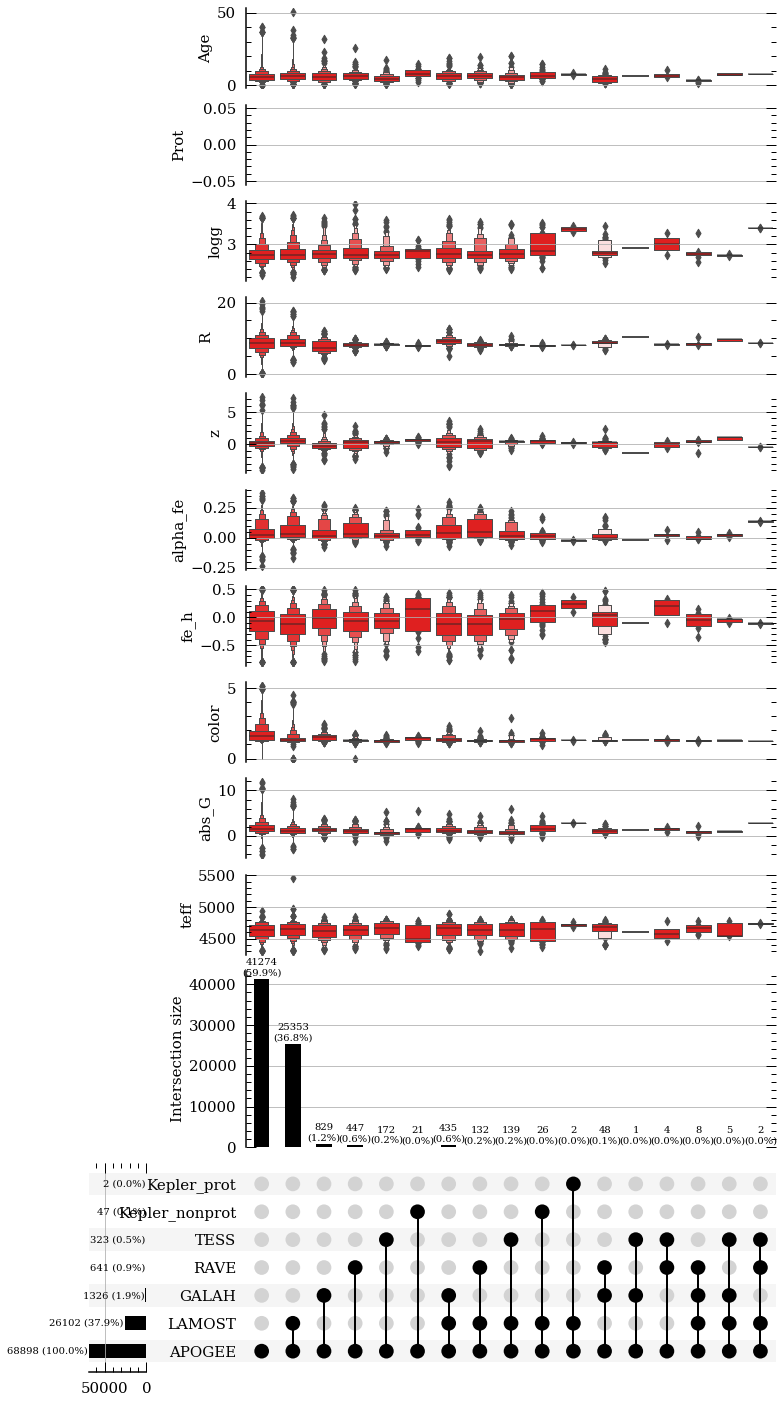

In [116]:
fig, ax=plt.figsize=(20,10)

#joindf=joindf.loc[abs(joindf['abs_G'])<1000]
#fehreplace=joindf[joindf['alpha_fe']<-1000]['fe_h'].values[0]
#joindf=joindf.replace(fehreplace, np.nan)

upset = UpSet(joindf, subset_size='count', show_counts='%d',element_size=42,show_percentages=True)
upset.add_catplot(value='teff', kind='boxen', color='red')
upset.add_catplot(value='abs_G', kind='boxen', color='red')
upset.add_catplot(value='color', kind='boxen', color='red')
upset.add_catplot(value='fe_h', kind='boxen', color='red')
upset.add_catplot(value='alpha_fe', kind='boxen', color='red')
upset.add_catplot(value='z', kind='boxen', color='red')
upset.add_catplot(value='R', kind='boxen', color='red')
upset.add_catplot(value='logg', kind='boxen', color='red')
upset.add_catplot(value='Prot', kind='boxen', color='red')
upset.add_catplot(value='Age', kind='boxen', color='red')
upset.plot()
current_figure = plt.gcf()
current_figure.savefig("Allparameters_boxen_cannon.png")








In [126]:
joindf_galah_apogee=joindf.loc[(True, True, False, False, False,  False, False)].reset_index(drop=True)

<ipython-input-126-93b569fa27dc>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  joindf_galah_apogee=joindf.loc[(True, True, False, False, False,  False, False)].reset_index(drop=True)


In [130]:
galah_apogee=pd.read_pickle('./Data/APOGEE_cm_GALAH.pkl')

joindf_galah_apogee

,APOGEE_ID,ID,teff,abs_G,X,Y,z,R,color,alpha_fe,fe_h,logg,Prot,sobject_id,KID,rave_obs_id,obsid,TICID,Age
0,2M00115995+0027464,2M00115995+0027464,4735.500000,0.546563,-0.275899,-1.258214,-2.307107,8.568779,1.199044,0.163189,-0.294482,2.8416,NaN,NaN,NaN,NaN,NaN,NaN,7.292820
1,2M00425604+0145357,2M00425604+0145357,4541.500000,0.909870,-0.138626,-0.254892,-0.524292,8.342521,1.276665,0.126039,-0.006349,2.5363,NaN,NaN,NaN,NaN,NaN,NaN,13.527689
2,2M00425604+0145357,2M00425604+0145357,4530.500000,0.909870,-0.138626,-0.254892,-0.524292,8.342521,1.276665,0.107789,-0.007149,2.5304,NaN,NaN,NaN,NaN,NaN,NaN,13.527689
3,2M01283881+0134565,2M01283881+0134565,4703.200195,1.356032,-0.352859,-0.278261,-0.775948,8.557385,1.218985,0.072409,-0.320122,2.7974,NaN,NaN,NaN,NaN,NaN,NaN,4.417908
4,2M03545696+2434265,2M03545696+2434265,4692.100098,1.213789,-0.467269,-0.102131,-0.192792,8.667871,1.335590,-0.022899,0.153128,2.9728,NaN,NaN,NaN,NaN,NaN,NaN,2.912357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2M21281404+0703202,2M21281404+0703202,4626.500000,1.622696,0.592780,-1.032376,-0.691382,7.676953,1.295325,0.024050,-0.053009,2.9471,NaN,NaN,NaN,NaN,NaN,NaN,8.553000
825,2M21285997+0645082,2M21285997+0645082,4597.100098,0.982133,1.379954,-2.389025,-1.623914,7.226373,1.242505,0.217019,-0.574942,2.5868,NaN,NaN,NaN,NaN,NaN,NaN,9.206018
826,2M21291026+0624143,2M21291026+0624143,4466.799805,0.982851,0.633698,-1.084219,-0.746388,7.643589,1.400997,-0.021582,0.289808,2.8175,NaN,NaN,NaN,NaN,NaN,NaN,4.805969
827,2M22503732+0727083,2M22503732+0727083,4489.600098,1.138194,0.265626,-1.288443,-1.302307,8.038307,1.369306,0.161869,-0.191062,2.6627,NaN,NaN,NaN,NaN,NaN,NaN,10.246871


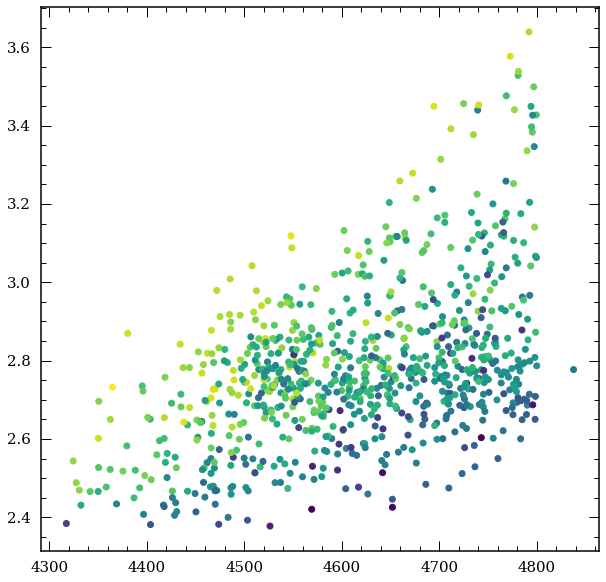

In [173]:
plt.scatter(joindf_galah_apogee['teff'],joindf_galah_apogee['logg'],c=joindf_galah_apogee['fe_h'])



In [174]:
GALAH_range=GALAH.loc[abs(GALAH['teff']-4550)<250]
GALAH_range=GALAH_range.loc[abs(GALAH_range['logg']-3)<0.6]

In [175]:
GALAH_range

,star_id,sobject_id,source_id_x,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,teff,...,panstarrs1,sdssdr13,skymapper2,urat1,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected
36,03361295-6859048,1.311160e+14,4.667302e+18,galah_main,138.0,0.0,10k_13,lbol,1.0,4715.758789,...,NaN,NaN,497237919.0,NaN,0.002938,0.002999,0.003809,12.616636,0.002938,169158.0
38,03324839-6851484,1.311160e+14,4.667271e+18,galah_main,138.0,0.0,10k_10,lbol,0.0,4676.030762,...,NaN,NaN,497238772.0,NaN,0.002762,0.002845,0.003803,12.984375,0.002762,120558.0
50,03354305-6918246,1.311160e+14,4.667199e+18,galah_main,138.0,0.0,10k_16,lbol,0.0,4754.706543,...,NaN,NaN,497237542.0,NaN,0.002761,0.002847,0.003794,11.688033,0.002761,397863.0
55,03332043-6857227,1.311160e+14,4.667258e+18,galah_main,138.0,0.0,10k_4,lbol,0.0,4412.920898,...,NaN,NaN,497238615.0,NaN,0.002765,0.002962,0.003805,12.892493,0.002765,131205.0
57,03353930-6932505,1.311160e+14,4.667179e+18,galah_main,138.0,0.0,10k_8,lbol,0.0,4703.874512,...,NaN,NaN,497237100.0,NaN,0.002761,0.002873,0.003802,11.871264,0.002761,336079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577339,15132988-4403163,1.902250e+14,6.003362e+18,galah_main,4235.0,0.0,190225,lbol,0.0,4794.922363,...,NaN,NaN,310627986.0,NaN,0.002758,0.002867,0.003790,9.824641,0.002758,2213550.0
577346,15144769-4406079,1.902250e+14,6.003440e+18,galah_main,4235.0,0.0,190225,lbol,0.0,4784.185547,...,NaN,NaN,310627826.0,NaN,0.002761,0.002847,0.003796,10.913098,0.002761,812283.0
577352,15155692-4410157,1.902250e+14,6.000435e+18,galah_main,4235.0,0.0,190225,lbol,0.0,4626.563477,...,NaN,NaN,310632253.0,NaN,0.002772,0.003283,0.003962,11.488928,0.002772,477942.0
577357,15142072-4415325,1.902250e+14,6.003345e+18,galah_main,4235.0,0.0,190225,lbol,0.0,4531.215332,...,NaN,NaN,310633091.0,NaN,0.002760,0.002839,0.003788,8.893404,0.002760,5218980.0


In [143]:
apogee=galah_apogee.loc[galah_apogee['APOGEE_ID'].isin(joindf_galah_apogee['APOGEE_ID'])]


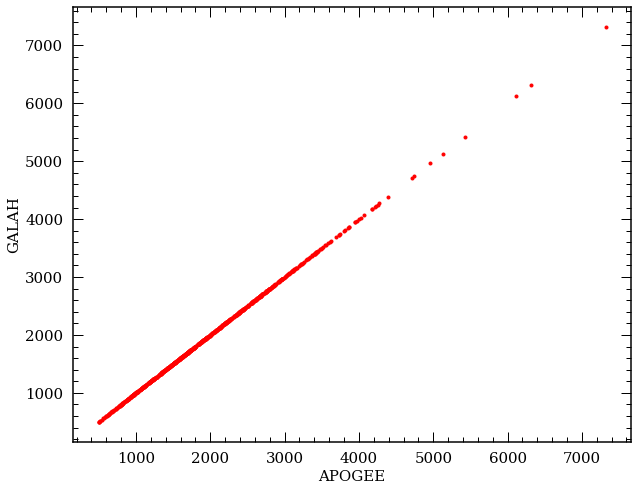

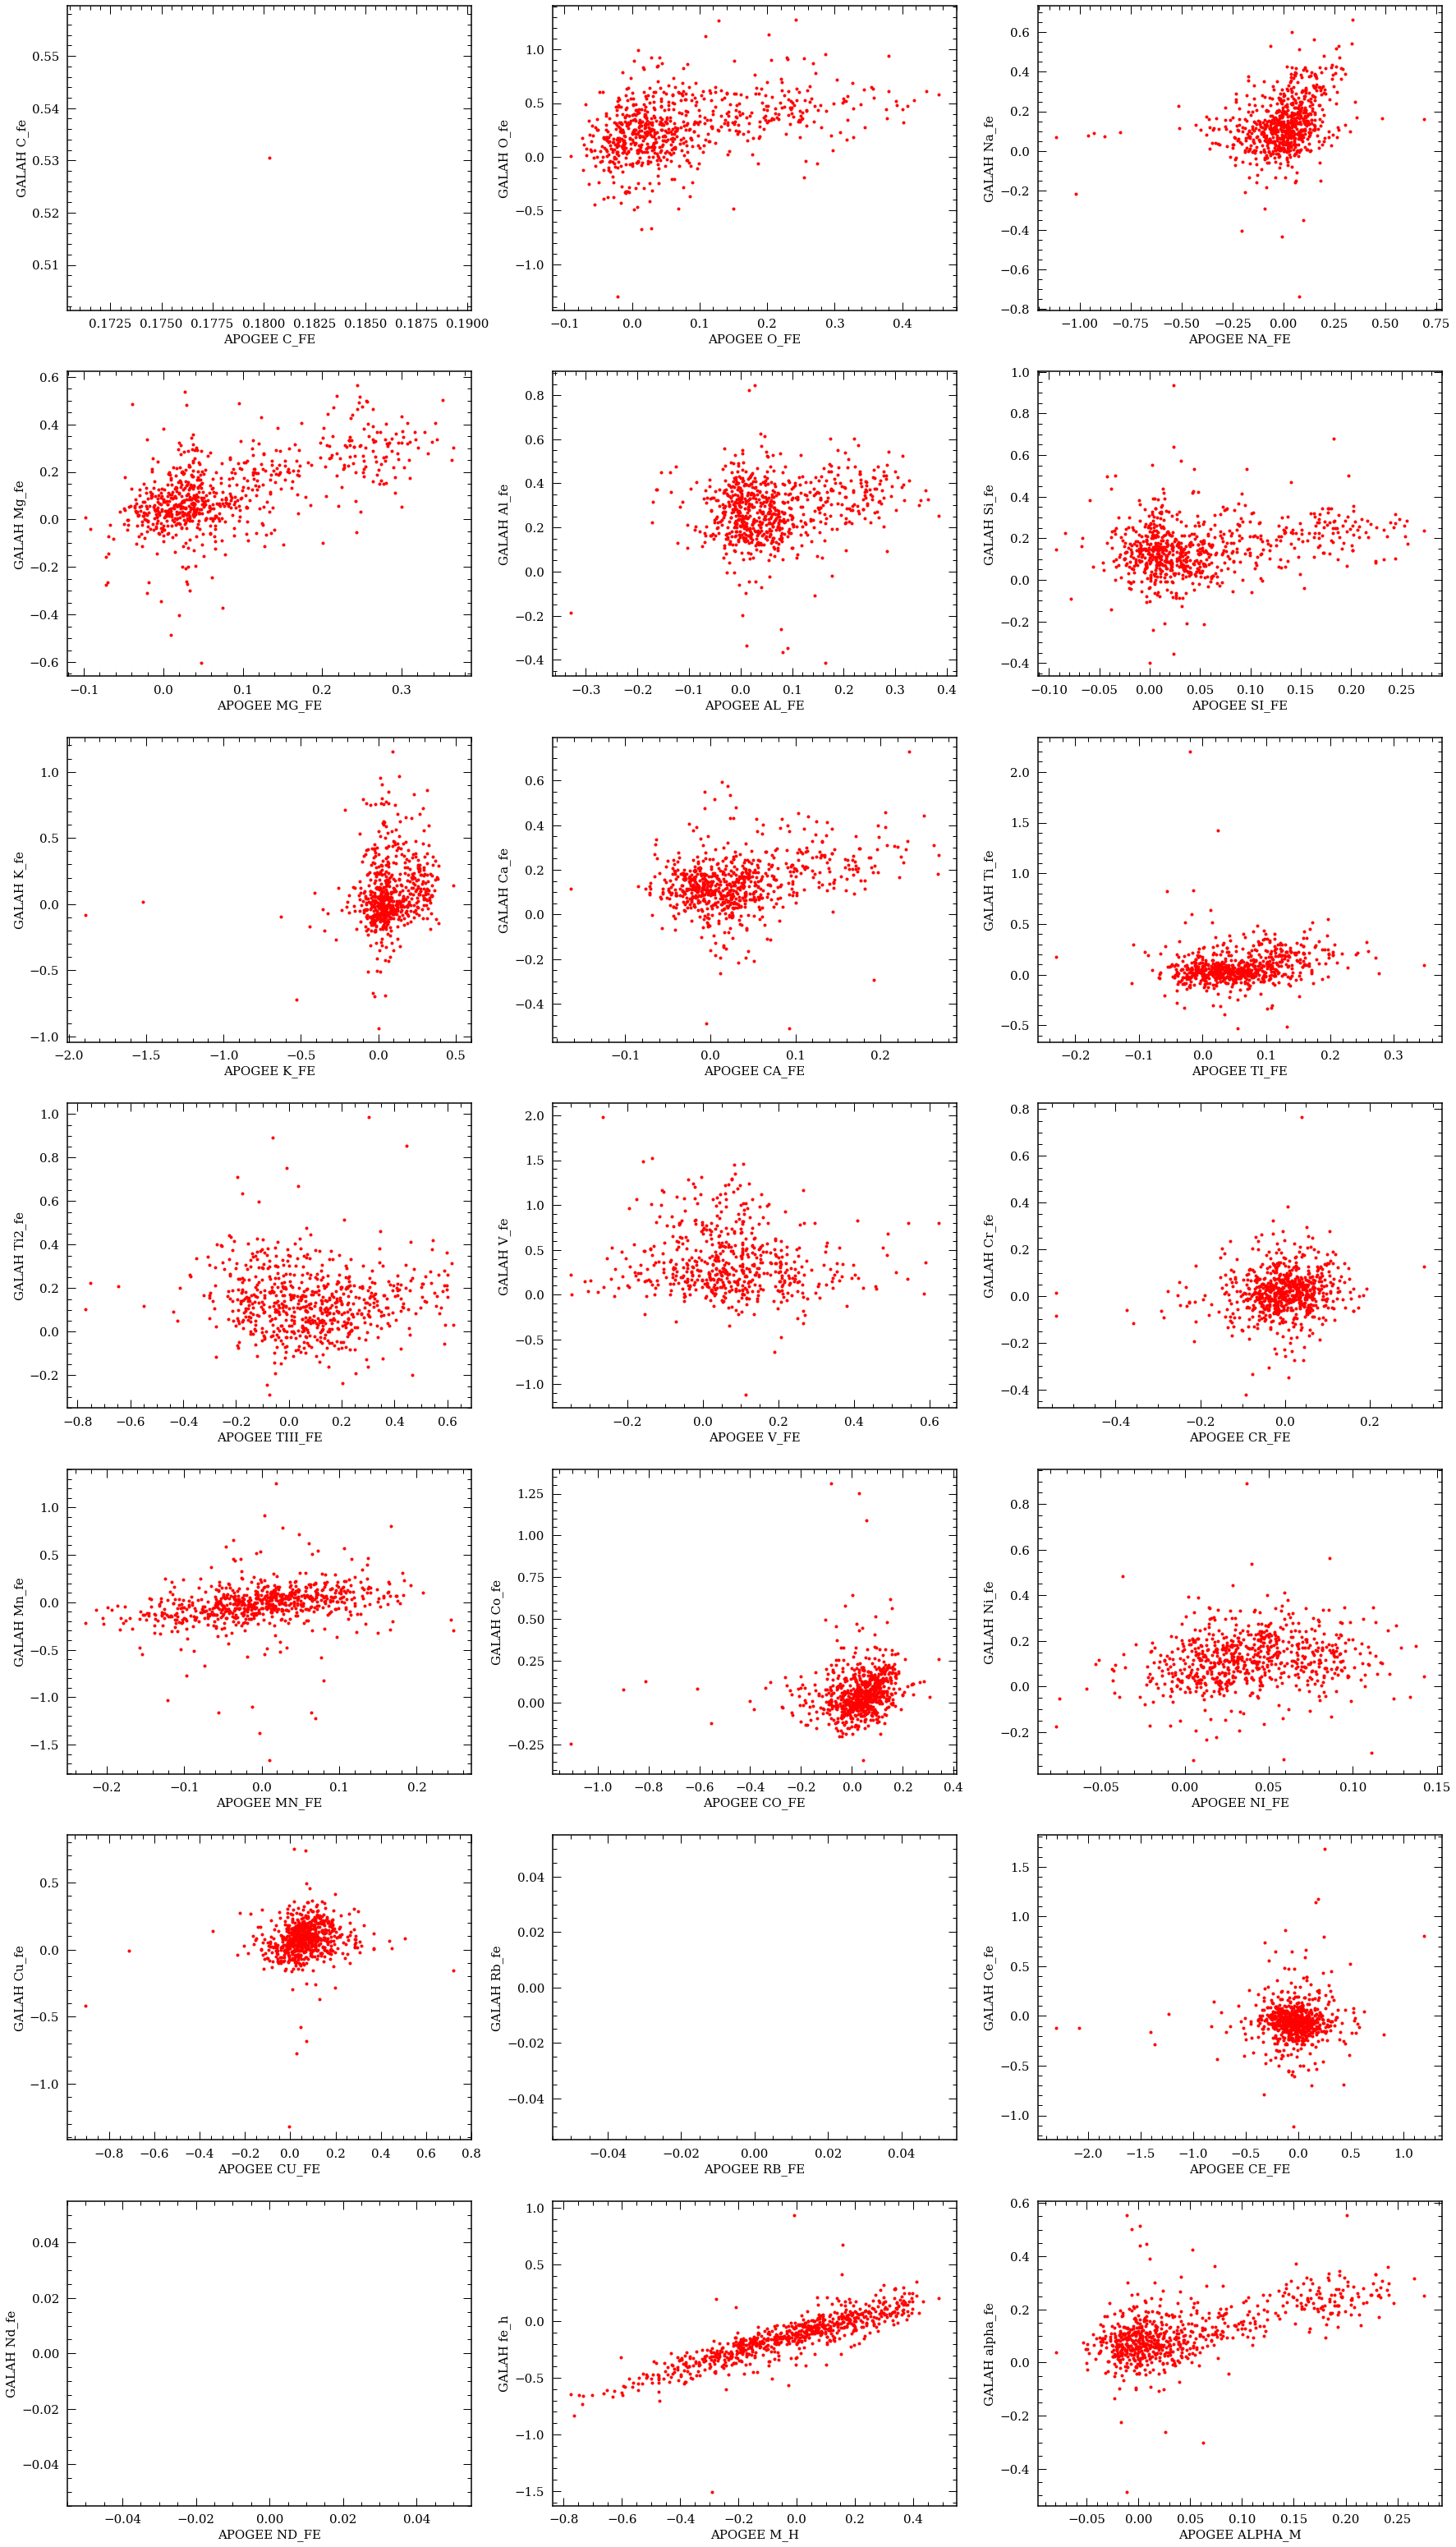

In [139]:
plt.figure(figsize=(10,8))
plt.plot(apogee['GAIA_R_EST'],apogee['r_est'],'r.')
plt.xlabel('APOGEE')
plt.ylabel('GALAH')

# compare elements
apogeelist=['C_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','K_FE','CA_FE','TI_FE','TIII_FE','V_FE',
           'CR_FE','MN_FE','CO_FE','NI_FE','CU_FE','RB_FE','CE_FE','ND_FE','M_H','ALPHA_M']
galahlist=['C_fe','O_fe','Na_fe','Mg_fe','Al_fe','Si_fe','K_fe','Ca_fe','Ti_fe','Ti2_fe','V_fe',
           'Cr_fe','Mn_fe','Co_fe','Ni_fe','Cu_fe','Rb_fe','Ce_fe','Nd_fe','fe_h','alpha_fe']
apogee_e=apogee[apogeelist]
galah_e=apogee[galahlist]

plt.figure(figsize=(30,56))
for i in range(len(apogeelist)):
    plt.subplot(7,3,i+1)
    m=(abs(apogee_e[apogeelist[i]])<1000)&(abs(galah_e[galahlist[i]])<1000)
    plt.plot(apogee_e[apogeelist[i]][m],galah_e[galahlist[i]][m],'r.')
    plt.xlabel('APOGEE '+apogeelist[i])
    plt.ylabel('GALAH '+galahlist[i])

In [144]:
list(apogee.columns)

['star_id',
 'sobject_id',
 'source_id_x',
 'survey_name',
 'field_id',
 'flag_repeat',
 'wg4_field',
 'wg4_pipeline',
 'flag_sp',
 'teff',
 'e_teff',
 'irfm_teff',
 'irfm_ebv',
 'irfm_ebv_ref',
 'logg',
 'e_logg',
 'fe_h',
 'e_fe_h',
 'flag_fe_h',
 'fe_h_atmo',
 'vmic',
 'vbroad',
 'e_vbroad',
 'chi2_sp',
 'alpha_fe',
 'e_alpha_fe',
 'nr_alpha_fe',
 'flag_alpha_fe',
 'flux_A_Fe',
 'chi_A_Fe',
 'Li_fe',
 'e_Li_fe',
 'nr_Li_fe',
 'flag_Li_fe',
 'C_fe',
 'e_C_fe',
 'nr_C_fe',
 'flag_C_fe',
 'O_fe',
 'e_O_fe',
 'nr_O_fe',
 'flag_O_fe',
 'Na_fe',
 'e_Na_fe',
 'nr_Na_fe',
 'flag_Na_fe',
 'Mg_fe',
 'e_Mg_fe',
 'nr_Mg_fe',
 'flag_Mg_fe',
 'Al_fe',
 'e_Al_fe',
 'nr_Al_fe',
 'flag_Al_fe',
 'Si_fe',
 'e_Si_fe',
 'nr_Si_fe',
 'flag_Si_fe',
 'K_fe',
 'e_K_fe',
 'nr_K_fe',
 'flag_K_fe',
 'Ca_fe',
 'e_Ca_fe',
 'nr_Ca_fe',
 'flag_Ca_fe',
 'Sc_fe',
 'e_Sc_fe',
 'nr_Sc_fe',
 'flag_Sc_fe',
 'Ti_fe',
 'e_Ti_fe',
 'nr_Ti_fe',
 'flag_Ti_fe',
 'Ti2_fe',
 'e_Ti2_fe',
 'nr_Ti2_fe',
 'flag_Ti2_fe',
 'V_fe',
 '

In [153]:
names=' '
for i in apogee['sobject_id']:
    names=names+','+str(int(i))
names

' ,131123004101251,131216001602078,131216001602232,131216001602303,131216001602315,131216001602318,131216001602359,131216001602386,131217001801190,140111002102020,140111002102029,140111002102054,140111002102084,140111002102090,140111002102149,140111002102179,140111002102185,140111002102202,140111002102204,140111002102205,140111002102219,140111002102261,140111002102262,140111002102271,140111002102285,140111002102291,140111002102294,140111002102317,140111002102327,140111002102328,140111002102333,140111002102336,140111002102364,140113005202017,140117002101021,140117002101115,140117002101140,140117002101307,140118002501003,140118002501065,140118002501079,140118002501114,140118002501149,140118002501153,140118002501162,140118002501164,140118002501183,140118002501186,140118002501284,140118002501331,140118002501393,140118002502013,140118002502134,140118002502245,140118002502338,140209003202003,140209003202007,140209003202294,140209003202321,140209003202346,140209003202366,140409003601128,14041

In [162]:
from astropy.io import fits
sp=fits.open('/Users/yl4331/Downloads/3e605011-0254-4b5f-8077-204180e789fb/galah/dr3/spectra/hermes/1312160016020781.fits')

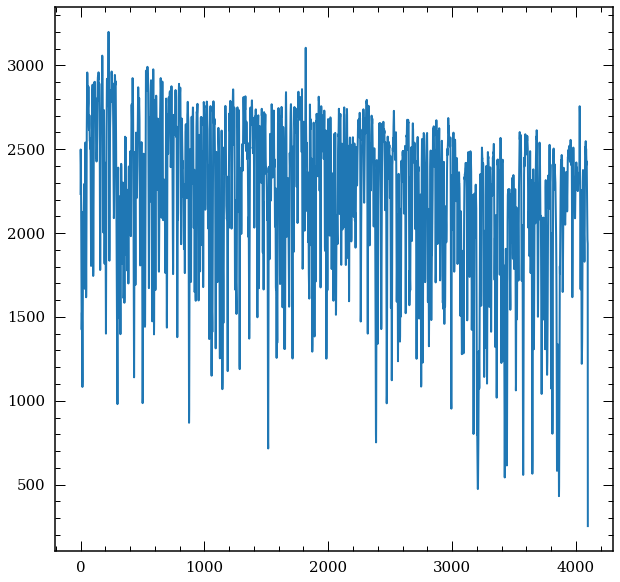

In [172]:
def interpolate_to_grid(xdata, ydata, xgrid):
    f = interpolate.interp1d(xdata, ydata)
    new_ydata= f(xgrid)
    return xgrid, new_ydata

# interpolate to common wl grid

plt.plot(pd.DataFrame(sp[0].data))

# gausian filter smooth by 50 A
flux_norm= scipy.ndimage.gaussian_filter1d(flux, width) # where width = 50 or 100 Convert between pixels and angstroms in setting the width


In [ ]:
wls=4713.60546875
wls_

In [180]:
#apogee.to_pickle('Data/GALAH_APOGEE_APOCAN.pkl')